# import data from csv files

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

updf1 = pd.read_csv("./data_files/up/upFor5(1).csv")
updf2 = pd.read_csv("./data_files/up/upFor5(2).csv")
updf3 = pd.read_csv("./data_files/up/upFor5(3).csv")
updf4 = pd.read_csv("./data_files/up/upFor5(4).csv")
updf5 = pd.read_csv("./data_files/up/upFor5(5).csv")
downdf1 = pd.read_csv("./data_files/down/downFor5(1).csv")
downdf2 = pd.read_csv("./data_files/down/downFor5(2).csv")
downdf3 = pd.read_csv("./data_files/down/downFor5(3).csv")
downdf4 = pd.read_csv("./data_files/down/downFor5(4).csv")
downdf5 = pd.read_csv("./data_files/down/downFor5(5).csv")
frames = [downdf1, downdf2, downdf3, downdf4, downdf5, updf1, updf2, updf3, updf4, updf5]
df = pd.concat(frames)

df.head()

,timestampMs,poorSignal,eegRawValue,eegRawValueVolts,attention,meditation,blinkStrength,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid,action
0,1.544360e+12,0,6,0.000001,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down
1,1.544360e+12,0,-275,-0.000060,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down
2,1.544360e+12,0,-289,-0.000063,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down
3,1.544360e+12,0,6,0.000001,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down
4,1.544360e+12,0,51,0.000011,50,51,39,522632,82675,16772926,16745932,76060,13388,26761,13100,down


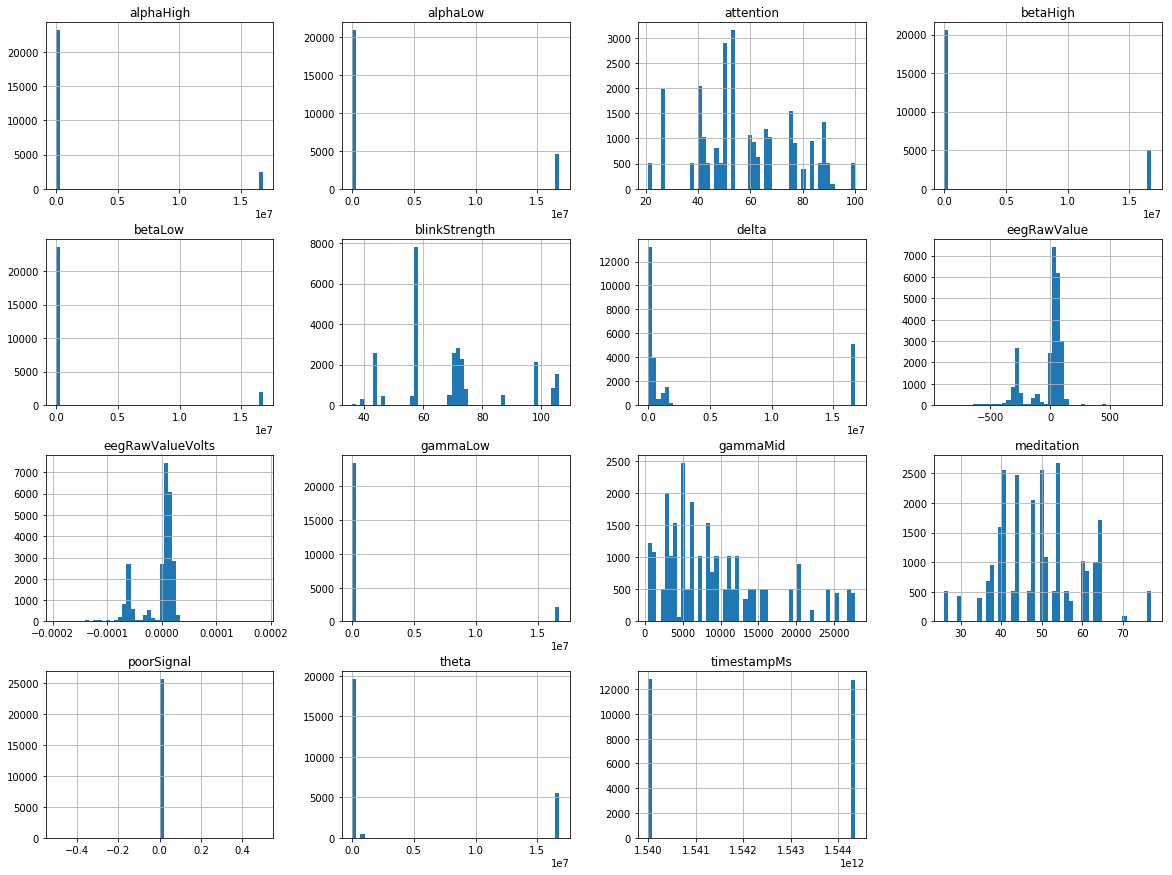

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15)) 
plt.show()

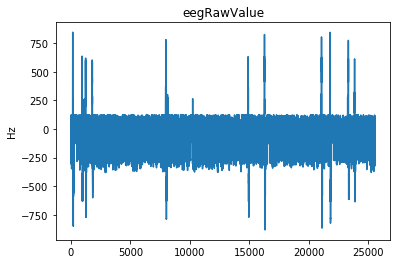

In [3]:
plt.plot(df.eegRawValue.values)
plt.ylabel('Hz')
plt.title('eegRawValue')
plt.show()

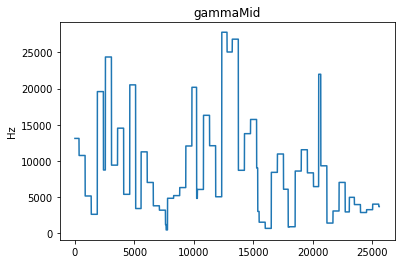

In [4]:
plt.plot(df.gammaMid.values)
plt.ylabel('Hz')
plt.title('gammaMid')
plt.show()

# Creating a 2d array of brain wave values

In [5]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(9)] for y in range(len(df))])
for i in range(len(df)):
    data[i] = [df.eegRawValue.values[i],
               df.delta.values[i],
               df.theta.values[i],
               df.alphaLow.values[i],
               df.alphaHigh.values[i],
               df.betaLow.values[i],
               df.betaHigh.values[i],
               df.gammaLow.values[i],
               df.gammaMid.values[i]]

In [13]:
data

array([[       6,   522632,    82675, ...,    13388,    26761,    13100],
       [    -275,   522632,    82675, ...,    13388,    26761,    13100],
       [    -289,   522632,    82675, ...,    13388,    26761,    13100],
       ...,
       [      58,   479427,    76283, ...,    30074, 16748195,     3664],
       [      69,   479427,    76283, ...,    30074, 16748195,     3664],
       [      82,   479427,    76283, ...,    30074, 16748195,     3664]])

In [6]:
encoder = LabelBinarizer()
labels = encoder.fit_transform(df.action.values)
labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [15]:
df.action.values

array(['down', 'down', 'down', ..., 'up', 'up', 'up'], dtype=object)

# Create training and test sets

In [7]:
# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

Check that labels are random

In [8]:
y_train

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

Train model with Random Forest

In [17]:
# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Predict the test set and show the accuracy

In [18]:
print("The score for Random Forest ", rfc.score(x_test, y_test))
y_pred = rfc.predict(x_test)
print("The prediction for the test set is ", y_pred)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print(len(y_train))
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))

The score for Random Forest  1.0
The prediction for the test set is  [1 0 1 ... 1 0 0]
20462
Accuracy for x_test: 1.0


No handles with labels found to put in legend.


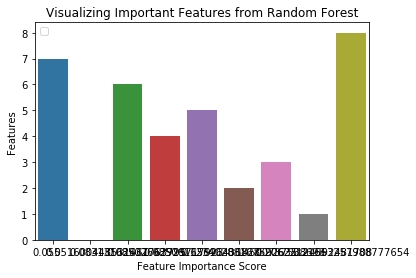

In [19]:
import pandas as pd
feature_imp = pd.Series(rfc.feature_importances_).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features from Random Forest")
plt.legend()
plt.show()

# XGBoost

In [29]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
print("The score for XGBoost ", xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)
print("The prediction for the test set is ", y_pred)

/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The score for XGBoost  1.0
The prediction for the test set is  [1 0 1 ... 1 0 0]


In [30]:
print("Accuracy for x_test:", metrics.accuracy_score(y_test, y_pred))

Accuracy for x_test: 1.0


Accuracy cant be this good


No handles with labels found to put in legend.


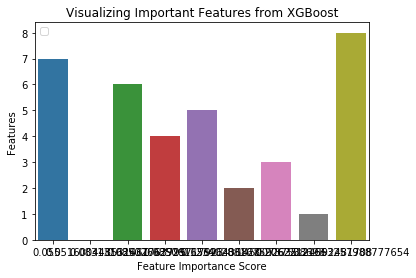

In [32]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features from XGBoost")
plt.legend()
plt.show()

# Shallow Neural Network

In [33]:

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(64, input_shape=(9,)))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

history = network.fit(x_train, y_train,
                      epochs=10, verbose=1)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(x_test))


Using TensorFlow backend.


Epoch 1/10
20462/20462 [==============================] - 1s 43us/step - loss: 6.9447 - acc: 0.5648
Epoch 2/10
20462/20462 [==============================] - 1s 31us/step - loss: 6.9447 - acc: 0.5648
Epoch 3/10
20462/20462 [==============================] - 1s 31us/step - loss: 6.9447 - acc: 0.5648
Epoch 4/10
20462/20462 [==============================] - 1s 31us/step - loss: 6.9447 - acc: 0.5648
Epoch 5/10
20462/20462 [==============================] - 1s 31us/step - loss: 6.9447 - acc: 0.5648
Epoch 6/10
20462/20462 [==============================] - 1s 31us/step - loss: 6.9447 - acc: 0.5648
Epoch 7/10
20462/20462 [==============================] - 1s 30us/step - loss: 6.9447 - acc: 0.5648
Epoch 8/10
20462/20462 [==============================] - 1s 31us/step - loss: 6.9447 - acc: 0.5648
Epoch 9/10
20462/20462 [==============================] - 1s 31us/step - loss: 6.9447 - acc: 0.5648
Epoch 10/10
5116/5116 [==============================] - 0s 21us/step
loss and metrics [7.0263210729

In [37]:
from keras.models import load_model

network.save('my_model.h5') 

In [42]:
# save as JSON
json_string = network.to_json()
json_string

import json
with open('model.json', 'w') as outfile:
    json.dump(json_string, outfile)

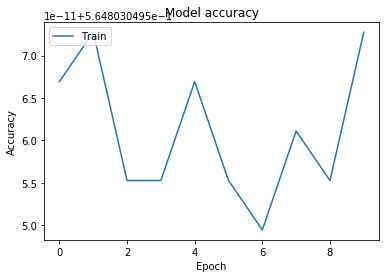

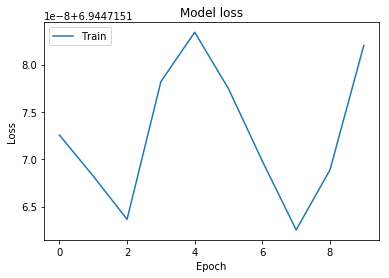

In [35]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [45]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


# Deep Neural Network

In [19]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(12)] for y in range(len(df))])
for i in range(len(df)):
    data[i] = [df.eegRawValue.values[i],
               df.delta.values[i],
               df.theta.values[i],
               df.alphaLow.values[i],
               df.alphaHigh.values[i],
               df.betaLow.values[i],
               df.betaHigh.values[i],
               df.gammaLow.values[i],
               df.gammaMid.values[i],
               df.meditation.values[i],
               df.attention.values[i],
               df.eegRawValueVolts.values[i]]
from keras import models
from keras import layers
from keras.utils.vis_utils import plot_model

network = models.Sequential()
network.add(layers.Dense(64, input_shape=(9,)))
network.add(layers.Dense(128, activation="relu"))
network.add(layers.Dense(256, activation="relu"))
network.add(layers.Dense(128, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

history = network.fit(x_train, y_train,
                      epochs=10, verbose=1)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(x_test))

Epoch 1/10
20462/20462 [==============================] - 1s 66us/step - loss: 8.1740 - acc: 0.4903
Epoch 2/10
20462/20462 [==============================] - 1s 47us/step - loss: 8.1740 - acc: 0.4903
Epoch 3/10
20462/20462 [==============================] - 1s 49us/step - loss: 8.1740 - acc: 0.4903
Epoch 4/10
20462/20462 [==============================] - 1s 47us/step - loss: 8.1740 - acc: 0.4903
Epoch 5/10
20462/20462 [==============================] - 1s 47us/step - loss: 8.1740 - acc: 0.4903
Epoch 6/10
20462/20462 [==============================] - 1s 46us/step - loss: 8.1740 - acc: 0.4903
Epoch 7/10
20462/20462 [==============================] - 1s 47us/step - loss: 8.1740 - acc: 0.4903
Epoch 8/10
20462/20462 [==============================] - 1s 50us/step - loss: 8.1740 - acc: 0.4903
Epoch 9/10
20462/20462 [==============================] - 1s 47us/step - loss: 8.1740 - acc: 0.4903
Epoch 10/10
5116/5116 [==============================] - 0s 24us/step
loss and metrics [8.1440258316

In [48]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total para

In [ ]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(12)] for y in range(len(df))])
for i in range(len(df)):
    data[i] = [df.eegRawValue.values[i],
               df.delta.values[i],
               df.theta.values[i],
               df.alphaLow.values[i],
               df.alphaHigh.values[i],
               df.betaLow.values[i],
               df.betaHigh.values[i],
               df.gammaLow.values[i],
               df.gammaMid.values[i],
               df.meditation.values[i],
               df.attention.values[i],
               df.eegRawValueVolts.values[i]]

from keras.utils.vis_utils import plot_model

network = models.Sequential()
network.add(layers.Dense(64, input_shape=(9,)))
network.add(layers.Dense(128, activation="relu"))
network.add(layers.Dense(256, activation="relu"))
network.add(layers.Dense(128, activation="relu"))
network.add(layers.Dense(256, activation="relu"))
network.add(layers.Dense(512, activation="relu"))
network.add(layers.Dense(1024, activation="relu"))
network.add(layers.Dense(512, activation="relu"))
network.add(layers.Dense(256, activation="relu"))
network.add(layers.Dense(128, activation="relu"))
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(32, activation="relu"))
network.add(layers.Dense(1, activation='sigmoid'))

# plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
                loss='binary_crossentropy',
                metrics=['acc'])

history = network.fit(x_train, y_train,
                      epochs=10, verbose=1)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(x_test))

In [11]:

from __future__ import print_function
import numpy as np
import keras
from keras import models
from keras import layers
from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
 
from hyperas import optim
from hyperas.distributions import choice, uniform


network = models.Sequential()
network.add(layers.Dense(64, input_shape=(9,)))
network.add(Dropout({{uniform(0, 1)}}))
network.add(layers.Dense(32, activation="relu"))
network.add(Dense({{choice([256, 512, 1024])}}))
network.add(Dropout({{uniform(0, 1)}}))
network.add(Activation({{choice(['relu', 'sigmoid'])}}))
network.add(layers.Dense(1, activation='sigmoid'))
network.add(Dropout({{uniform(0, 1)}}))

callbacks_list = [
#         keras.callbacks.EarlyStopping(
#             monitor='acc',
#             patience=1,
#         ),
#         keras.callbacks.ModelCheckpoint(
#             filepath='theTestModel.h5',
#             monitor='val_loss',
#             save_best_only=True,
#         ),
#         keras.callbacks.ReduceLROnPlateau(
#             monitor='val_loss',
#             factor=0.1,
#             patience=10
#         ),
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=0,
)
]
    
# Adam = Adam(lr=0.05)
network.compile(optimizer={{choice(['rmsprop', 'adam', 'sgd'])}},
                loss='binary_crossentropy',
                metrics=['acc'])

history = network.fit(x_train, y_train,
                      validation_data=(x_test, y_test),
                      batch_size={{choice([64, 128])}},
                      epochs=10, verbose=1, callbacks=callbacks_list)
#get the highest validation accuracy of the training epochs
validation_acc = np.amax(result.history['val_acc']) 
print('Best validation acc of epoch:', validation_acc)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

print('prediction: ', network.predict(x_test))

ModuleNotFoundError: No module named 'hyperas'

In [41]:
tensorboard --logdir=my_log_dir

SyntaxError: can't assign to operator (<ipython-input-41-2851327bad81>, line 1)

In [24]:
mkdir my_log_dir